In [ ]:
# Paso 1: Importacion de Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar dataset 
df = pd.read_csv("datos.csv")

# Vista general de las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Informacion general del dataset
print("\nInformación del dataset:")
df.info()

# Estadisticas descriptivas 
print("\nEstadísticas descriptivas:")
display(df.describe())

# Revision de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Revision de duplicados
print(f"\nCantidad de registros duplicados: {df.duplicated().sum()}")


Primeras filas del dataset:


,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB

Estadísticas descriptivas:


,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000



Valores nulos por columna:
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

Cantidad de registros duplicados: 0


In [ ]:
#paso 2: Limpieza de datos

# --- Eliminación de duplicados ---
df = df.drop_duplicates()
print(f"Registros después de eliminar duplicados: {df.shape[0]}")

# --- Manejo de valores nulos ---
print("Valores nulos por columna antes de limpiar:")
print(df.isnull().sum())

# Opción 1: eliminar filas con nulos
# df = df.dropna()

# Opción 2: imputar (ejemplo: con la media en columnas numéricas)
df = df.fillna(df.mean(numeric_only=True))

print("\nValores nulos después de limpiar:")
print(df.isnull().sum())

Registros después de eliminar duplicados: 15079
Valores nulos por columna antes de limpiar:
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

Valores nulos después de limpiar:
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


In [8]:

# Seleccionar solo columnas numéricas relevantes
X = df.select_dtypes(include=[np.number])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Tamaño de los datos escalados:", X_scaled.shape)

Tamaño de los datos escalados: (15079, 3)


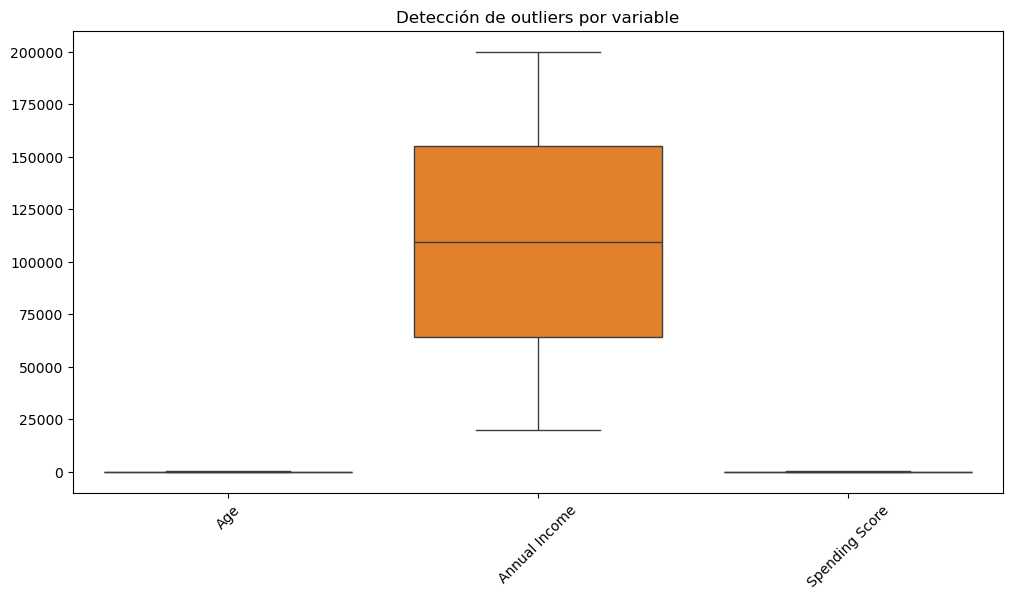

Cantidad de posibles outliers: 0


In [9]:
# Detección gráfica con boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Detección de outliers por variable")
plt.show()

# Detección numérica usando z-score
from scipy import stats

z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).sum(axis=1)  # filas con valores fuera de rango
print(f"Cantidad de posibles outliers: {(outliers > 0).sum()}") 

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

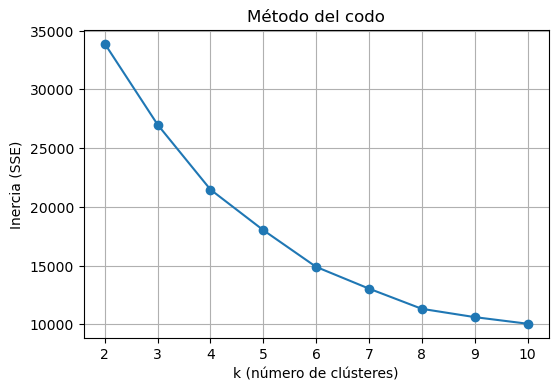

In [10]:
#Paso 3: Determinación del número óptimo de clústeres usando el método del codo

# Supone que ya tienes X_scaled del paso 2
k_vals = range(2, 11)  # puedes ampliar si lo ves necesario
inertias = []

for k in k_vals:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(k_vals), inertias, marker='o')
plt.xlabel('k (número de clústeres)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del codo')
plt.grid(True)
plt.show()

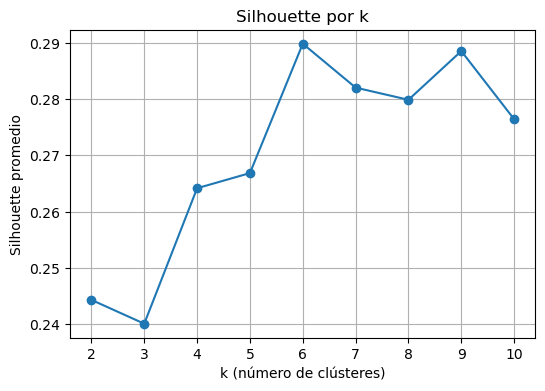

k sugerido por silhouette: 6


In [11]:
sil_scores = []
for k in k_vals:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, labels)
    sil_scores.append(s)

plt.figure(figsize=(6,4))
plt.plot(list(k_vals), sil_scores, marker='o')
plt.xlabel('k (número de clústeres)')
plt.ylabel('Silhouette promedio')
plt.title('Silhouette por k')
plt.grid(True)
plt.show()

# Sugerencia automática: k con mayor silhouette dentro del rango
k_opt_sug = k_vals[int(np.argmax(sil_scores))]
print("k sugerido por silhouette:", k_opt_sug)

In [12]:
# Usa el k que decidas (ejemplo: k_opt_sug)
k_final = k_opt_sug  # o reemplázalo por tu elección
kmeans = KMeans(n_clusters=k_final, init='k-means++', n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("Tamaños por clúster:")
print(df['cluster'].value_counts().sort_index())

# Guarda inercia y silhouette finales como evidencia
final_inertia = kmeans.inertia_
final_silhouette = silhouette_score(X_scaled, df['cluster'])
print("Inercia (SSE) final:", final_inertia)
print("Silhouette final:", round(final_silhouette, 4))

Tamaños por clúster:
cluster
0    2505
1    2427
2    2412
3    2606
4    2574
5    2555
Name: count, dtype: int64
Inercia (SSE) final: 14885.534787932254
Silhouette final: 0.2899


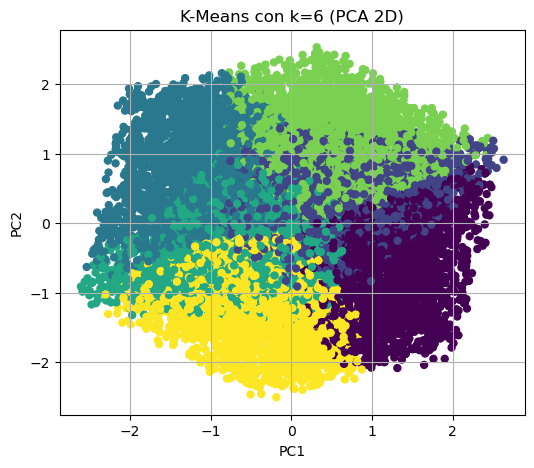

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df['cluster'], s=25)
plt.title(f'K-Means con k={k_final} (PCA 2D)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [14]:
# Agrupar los datos por clúster y calcular promedios
cluster_profiles = df.groupby("cluster").mean(numeric_only=True)
print("Promedios por clúster:")
display(cluster_profiles)

# También puedes calcular medianas si quieres ver robustez
cluster_median = df.groupby("cluster").median(numeric_only=True)
display(cluster_median)


Promedios por clúster:


,Age,Annual Income,Spending Score
cluster,,,
0,74.516966,80705.298204,25.073453
1,45.882159,160990.600742,22.373300
2,34.052653,142626.288557,76.328358
3,60.300077,59829.590944,78.608596
4,74.360140,155183.733489,65.982906
5,34.619961,63619.758904,34.036791


,Age,Annual Income,Spending Score
cluster,,,
0,76.0,79969.0,24.0
1,46.0,163735.0,21.0
2,33.0,144279.0,77.0
3,60.0,57925.0,79.0
4,75.0,156689.5,66.0
5,34.0,60435.0,34.0


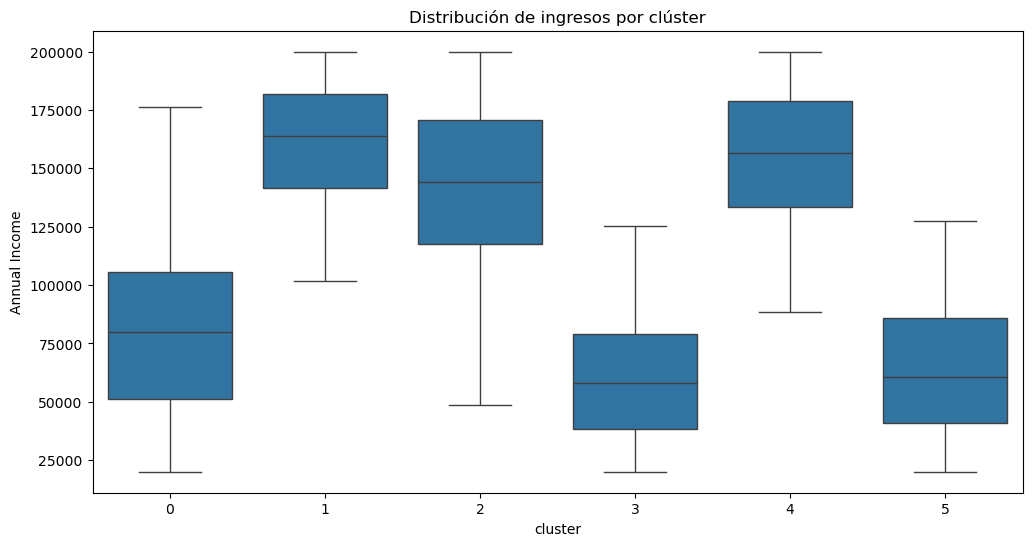

In [18]:
# Boxplots comparativos por clúster
plt.figure(figsize=(12,6))
sns.boxplot(x="cluster", y="Annual Income", data=df)  # ejemplo con variable "Income"
plt.title("Distribución de ingresos por clúster")
plt.show()


In [ ]:
# Promedios de variables relevantes por clúster
profiles = df.groupby("cluster").agg({
    "Age": "mean",
    "Annual Income": "mean",
    "Spending Score": "mean"  ################# ejemplo, cambia por las variables de tu dataset
}).round(2)

profiles["count"] = df.groupby("cluster").size()
print("Perfilado de consumidores:")
display(profiles)


Perfilado de consumidores:


,Age,Annual Income,Spending Score,count
cluster,,,,
0,74.52,80705.30,25.07,2505
1,45.88,160990.60,22.37,2427
2,34.05,142626.29,76.33,2412
3,60.30,59829.59,78.61,2606
4,74.36,155183.73,65.98,2574
5,34.62,63619.76,34.04,2555


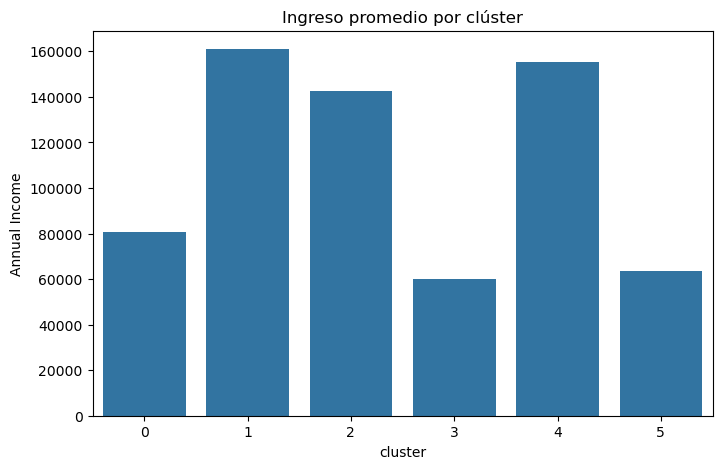

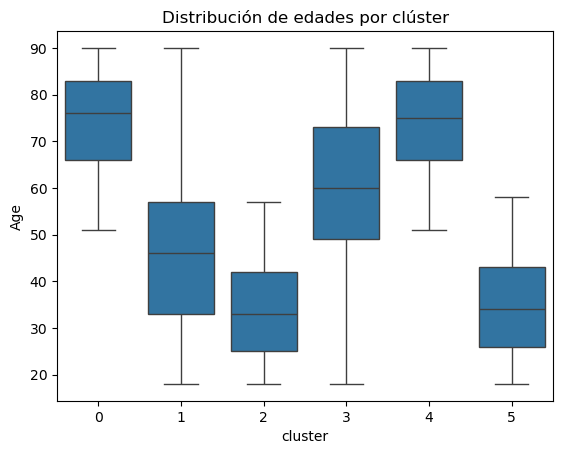

In [ ]:
# Comparacion visual de ingresos por clúster
plt.figure(figsize=(8,5))
sns.barplot(x=profiles.index, y=profiles["Annual Income"])
plt.title("Ingreso promedio por clúster")
plt.show()

# Distribución de edades
sns.boxplot(x="cluster", y="Age", data=df)
plt.title("Distribución de edades por clúster")
plt.show()
